## Simple Linear regression from scratch

*Just using Python*

* Make a dummy dataset
* Calculate various stats like mean, variance, covariance
* Find coefficients of straight line i.e. y= b0 + b1 * x using stats from previous step
* Fit this straight line of linear regression for dummy(training) data
* 
evaluate the regression using test data
* Calculate error

#### Let's implement it!

In [1]:
dataset = [[1,2], [2,2], [2,3], [3,2], [5,3], [4,4]]  # just 6 data points

Visualize it

(0.0, 6.0, 0.0, 5.0)

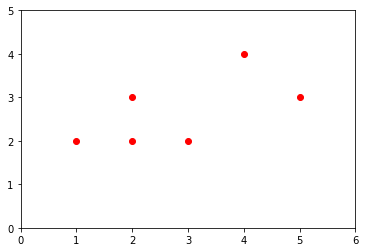

In [2]:
import matplotlib.pyplot as plt
d_x = [row[0] for row in dataset]
d_y = [row[1] for row in dataset]
plt.plot(d_x, d_y, 'ro')
plt.axis([0,6,0,5])

#### Calculate mean

In [3]:
def mean(datapoints):
    return sum(datapoints) / float(len(datapoints))

#### Calculate variance

In [4]:
def variance(datapoints, mean):
    return sum([(x - mean)**2 for x in datapoints])

#### Calculate covariance

In [5]:
def covariance(x, mean_x, y, mean_y):
    cov = 0.0
    for i in range(len(x)):
        cov += (x[i] - mean_x) * (y[i] - mean_y)
    return cov

Now, we have calculated mean, variance, covariance. But what's the use of all these calculations?

All these parameters are the parameters which calculate the values of coefficients of linear regression equation. How?

Le's see...

Eqn of straight line is given by : y = b0 + b1 * x , where b0 is the intercept on y-axis and b1 is the slope of the regression line.

b0 and b1 are calculated using mean, varance and covariance as shown below:

b1 = covariance(x, y) / variance(x)

b0 = mean(y) - b1 * mean(x)


In [6]:
def coefficients(datapoints):
    # datapoints is a list of lists containing 2 element list at each index eg: [[a,b],[c,d],....]
    # so we are using a simple loop on the main list
    # this loop traverse each index which is having a list of 2 element
    # from those index we are storing each 0th element in the list named x
    # and 1th index element is being stored in list named y

    x = [row[0] for row in datapoints]
    y = [row[1] for row in datapoints]
    x_mean, y_mean = mean(x), mean(y)
    b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
    b0 = y_mean - b1 * x_mean
    return [b0, b1]


#### Now comes the prediction part

define linear_regression function which will coompute the prediction list for yhe given datapoints

In [7]:
# Here in this function, we are using both train and test data because train data will compute the desired coefficients i.e fitting the model to the datapoints
# and test data will be used for prediction using coefficients already computed by train data
# yhat(Ῠ) denotes the predicted value of y

def simple_linear_regression(train, test):
    prediction = list()
    b0, b1 = coefficients(train)
    for row in test:
        yhat = b0 + b1 * row[0]
        prediction.append(yhat)
    return prediction 

#### Writing Error_metric and Evaluation function
rmse_metric will calculate rmse(root mean squared error)

rmse = sum((actual(y)-prediction(Ῠ))**2) over all datapoints

In [13]:
def rmse_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(actual))
    return mean_error

This functon will do the real stuff of integrating all the elements

In [17]:
def evaluate_algo(dataset, algorithm):
    test_set = list()
    for row in dataset:
        row_copy = list(row)
        row_copy[-1] = None
        test_set.append(row_copy)
    predicted = algorithm(dataset, test_set)
    # print(predicted)
    actual = [row[-1] for row in dataset]
    rmse = rmse_metric(actual, predicted)
    return [predicted,rmse]

#### Test Simple linear regression

In [18]:
pred, rmse = evaluate_algo(dataset, simple_linear_regression)   # model training
print('RMSE : ', rmse)

RMSE :  0.34871794871794887


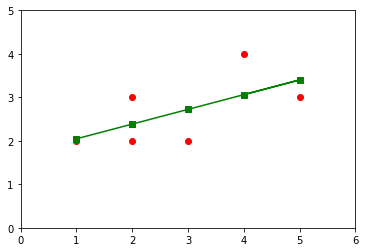

In [28]:
plt.plot(d_x, d_y,'ro')
plt.axis([0,6,0,5])
plt.plot(d_x, pred, color = "green",marker ='s', linestyle = "solid")

# green solid line with square points shows the predicted values or line of best fit for the given data points i.e red points
# So this completes out prediction phase of linear regression

Here we got our predicted values as green line using simple linear regression.
